In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

import random

random.seed(10)
np.random.seed(10)
sns.set_theme()

In [3]:
artificial_df = pd.read_csv('/content/pca_2d_dataset.csv')
artificial_df.head()

,Feature 1,Feature 2
0,0,11.031906
1,2,10.816060
2,4,11.836182
3,6,17.749648
4,8,17.568312


Text(0.5, 1.0, 'Example dataset')

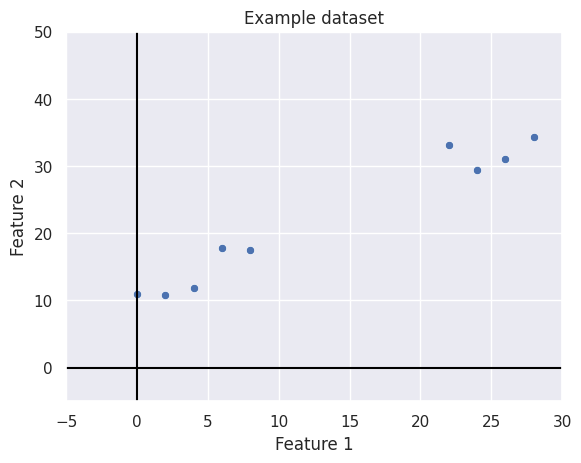

In [4]:
# Plot the dataset

sns.scatterplot(artificial_df,x='Feature 1',y='Feature 2')

plt.hlines(xmin=-5, xmax=30, y=0, color='black')
plt.vlines(ymin=-5, ymax=50, x=0, color='black')

plt.xlim([-5, 30])
plt.ylim([-5, 50])

plt.title('Example dataset')


Text(0.5, 1.0, 'Scaled dataset')

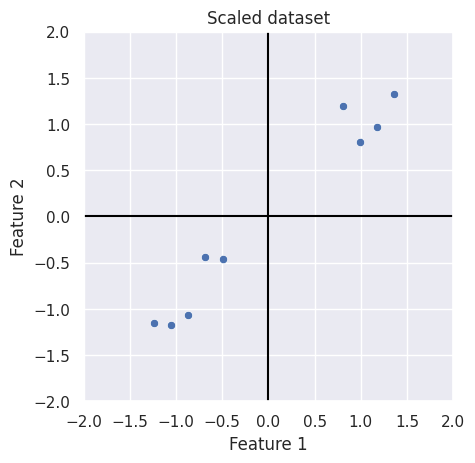

In [5]:
# Scale the data

artificial_df[:] = StandardScaler().fit_transform(artificial_df)

sns.scatterplot(artificial_df,x='Feature 1',y='Feature 2')

plt.hlines(xmin=-5, xmax=30, y=0, color='black')
plt.vlines(ymin=-5, ymax=50, x=0, color='black')

plt.xlim([-2, 2])
plt.ylim([-2, 2])

plt.gca().set_aspect('equal', adjustable='box')
plt.title('Scaled dataset')

In [6]:
# Calculate covariance matrix

cov_mtx = artificial_df.cov().to_numpy()

cov_mtx

array([[1.125     , 1.10293497],
       [1.10293497, 1.125     ]])

In [7]:
# Calculate eigenvalues and eigenvectors of the covariance matrix

eigenvalues, eigenvectors = np.linalg.eig(cov_mtx)

In [8]:
eigenvalues

array([2.22793497, 0.02206503])

In [9]:
eigenvectors

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

Text(0.5, 1.0, 'PC1 and PC2 in original coordinate system')

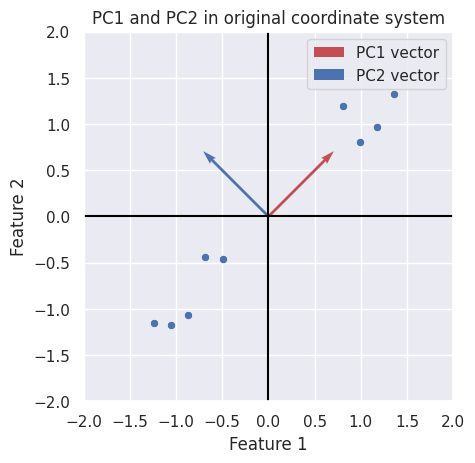

In [15]:
# Plot PCs in the original coordinate system

plt.figure()

sns.scatterplot(artificial_df,x='Feature 1',y='Feature 2')

plt.hlines(xmin=-5, xmax=30, y=0, color='black')
plt.vlines(ymin=-5, ymax=50, x=0, color='black')

plt.xlim([-2, 2])
plt.ylim([-2, 2])

plt.quiver(
    0, 0,
    eigenvectors[:, 0][0],
    eigenvectors[:, 0][1],
    angles='xy', scale_units='xy',
    scale=1, color='r',
    label="PC1 vector"
)
plt.quiver(
    0, 0,
    eigenvectors[:, 1][0], eigenvectors[:, 1][1],
    angles='xy', scale_units='xy',
    scale=1, color='b',
    label="PC2 vector"
)

plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.title('PC1 and PC2 in original coordinate system')

Text(0.5, 1.0, 'PC1 and PC2 in original coordinate system')

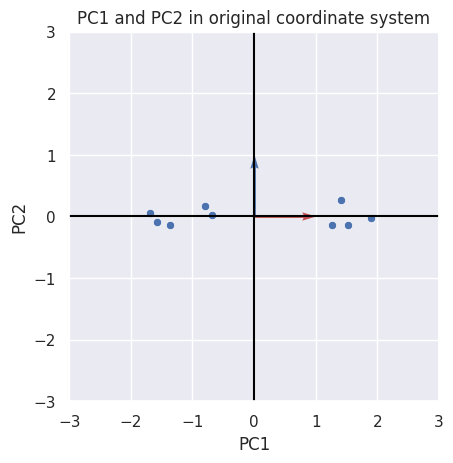

In [16]:
# Perform change of basis

transformed_data = eigenvectors.T @ artificial_df.to_numpy().T

transformed_df = pd.DataFrame(transformed_data.T, columns=['PC1', 'PC2'])

# Change basis for eigenvectors

transformed_axis = eigenvectors.T @ eigenvectors

plt.figure()

sns.scatterplot(transformed_df,x='PC1',y='PC2')

plt.hlines(xmin=-5, xmax=30, y=0, color='black')
plt.vlines(ymin=-5, ymax=50, x=0, color='black')

plt.quiver(
    0, 0,
    transformed_axis[0][0],
    transformed_axis[0][1],
    angles='xy', scale_units='xy',
    scale=1, color='r',
    label="PC1 vector"
)
plt.quiver(
    0, 0,
    transformed_axis[1][0],
    transformed_axis[1][1],
    angles='xy', scale_units='xy',
    scale=1, color='b',
    label="PC2 vector"
)

plt.xlim([-3, 3])
plt.ylim([-3, 3])

plt.gca().set_aspect('equal', adjustable='box')
plt.title('PC1 and PC2 in original coordinate system')

In [17]:
def plot_data_and_axis(data, eigenvectors=None, axis_min=None,
                        axis_max=None, figsize=None):

    """
    This function plots data in a 3D coordinate system.
    This functio also plots coordinate system axis or arbitrary
    set of vectors.

    :param data: numpy dataset with 3 features
    :param eigenvectors: transposed eigenvector matrix
    :param axis_min: min value for each axis on the plot
    :param axis_max: max value for each axis on the plot
    :return:
    """

    # Create 3D figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection='3d')

    # Plot the data
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], alpha=0.2)

    # Set axis labels
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')

    # Set minimum and maximum value for axis
    if axis_min and axis_max:
        ax.set_xlim(axis_min, axis_max)
        ax.set_ylim(axis_min, axis_max)
        ax.set_zlim(axis_min, axis_max)

    ax.view_init(elev=20, azim=-35, roll=0)

    # Choose which axis will be plotted (arrow tips)
    if eigenvectors is not None:
        plot_vectors = eigenvectors
    else:
        plot_vectors = [
            [1, 0, 0],
            [0, 1, 0],
            [0, 0, 1]
        ]

    # Always set origin at [0,0,0] (arrow starting point)
    origin = [0, 0, 0]

    # Iterate over coordinate system arrows (three of them)
    for i, component in enumerate(plot_vectors):

        # Plot arrow
        ax.quiver(
            origin[0],
            origin[1],
            origin[2],
            component[0],
            component[1],
            component[2],
            color=['r', 'g', 'b'][i],
            lw=2
        )

    plt.show()

In [18]:
# Create 2D normaly distributed data
mean = np.array([0,0])
cov = np.array([[1,0.5],[0.5,1]])

# Create feature z
x_y_data = np.random.multivariate_normal(mean, cov, 500)
z_col = 1.5*x_y_data[:,1]

# Merge z col with x and y
np_data_3D = np.column_stack([x_y_data, z_col])

# Create dataframe in order to display data
df_3D = pd.DataFrame(np_data_3D, columns=['x', 'y', 'z'])
df_3D.head()

,x,y,z
0,-1.510827,-0.795548,-1.193322
1,1.342548,1.334164,2.001246
2,-0.178050,-0.898136,-1.347203
3,-0.284214,-0.175666,-0.263498
4,0.083584,-0.091017,-0.136525


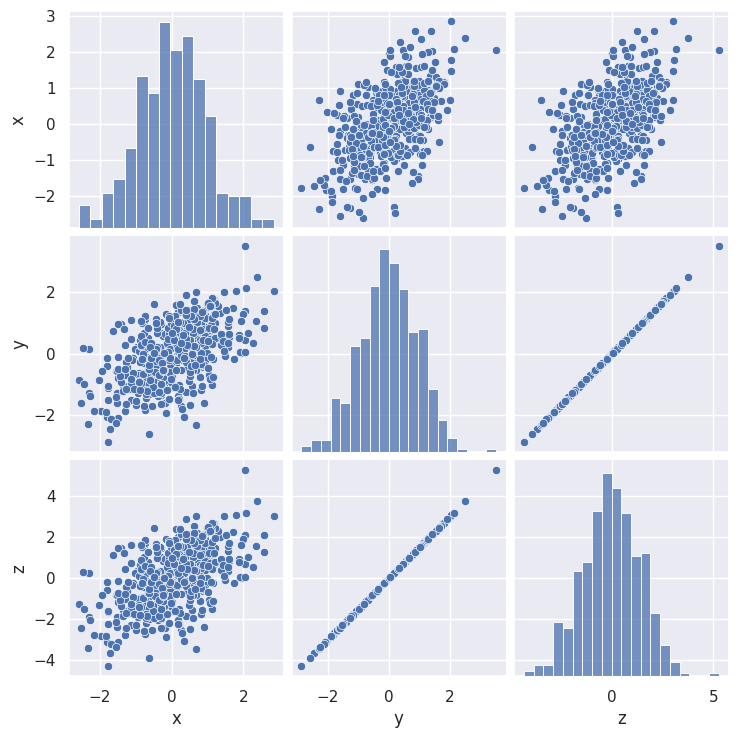

In [19]:
sns.pairplot(df_3D)

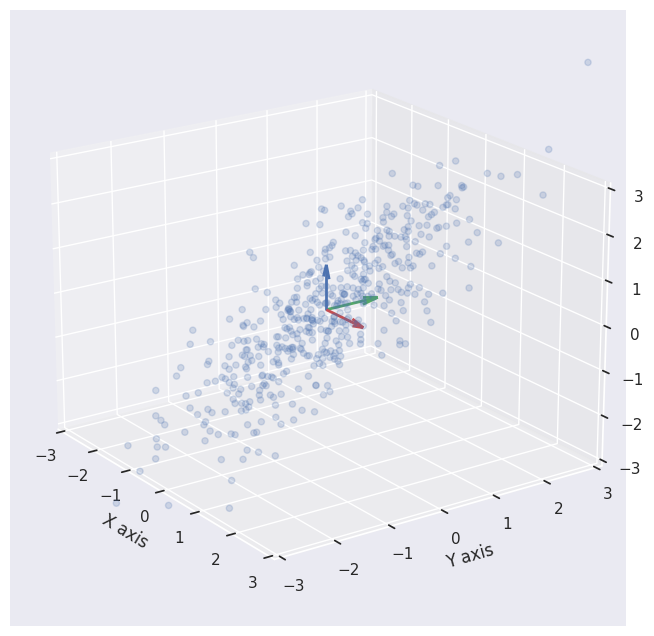

In [20]:
# Plot the data in the original coordinate system

plot_data_and_axis(
    data=np_data_3D,
    axis_min = -3,
    axis_max=3,
    figsize=(8,8)
)

In [21]:
# Calculate covariance matrix

cov_mtx = df_3D.cov().to_numpy()

cov_mtx

array([[0.90523183, 0.4721996 , 0.7082994 ],
       [0.4721996 , 0.88894324, 1.33341486],
       [0.7082994 , 1.33341486, 2.00012229]])

In [22]:
# Calculate eigenvalues and eigenvectors of covariance matrix

eigenvalues, eigenvectors = np.linalg.eig(cov_mtx)

In [23]:
eigenvalues

array([5.90029887e-01, 3.20426748e+00, 4.31088651e-16])

In [24]:
np.set_printoptions(suppress=True)
eigenvalues / np.sum(eigenvalues)*100

array([15.55043872, 84.44956128,  0.        ])

In [25]:
eigenvectors

array([[-0.93777861,  0.34723374,  0.        ],
       [ 0.19261062,  0.52018598, -0.83205029],
       [ 0.28891594,  0.78027897,  0.5547002 ]])

In [26]:
sort_idx = np.flip(np.argsort(eigenvalues))
sort_idx

array([1, 0, 2])

In [27]:
eigenvalues = eigenvalues[sort_idx]
eigenvalues

array([3.20426748, 0.59002989, 0.        ])

In [28]:
eigenvectors = eigenvectors[:, sort_idx]
eigenvectors

array([[ 0.34723374, -0.93777861,  0.        ],
       [ 0.52018598,  0.19261062, -0.83205029],
       [ 0.78027897,  0.28891594,  0.5547002 ]])

In [29]:
eigenvectors.T

array([[ 0.34723374,  0.52018598,  0.78027897],
       [-0.93777861,  0.19261062,  0.28891594],
       [ 0.        , -0.83205029,  0.5547002 ]])

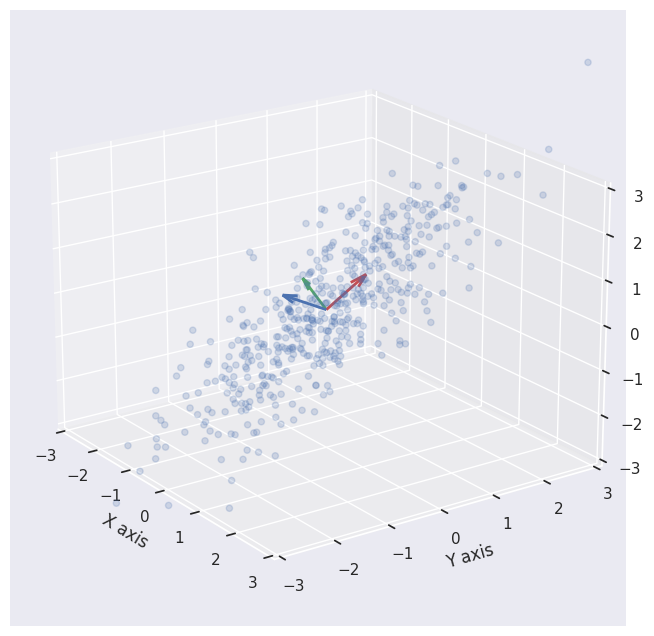

In [30]:
# Plot the data and the principal components

plot_data_and_axis(
    data=np_data_3D,
    eigenvectors=eigenvectors.T,
    axis_min = -3,
    axis_max=3,
    figsize=(8,8)
)

In [31]:
# Transform data to 2D

transformation_matrix = eigenvectors[:, :-1].T

transformed_data = transformation_matrix @ df_3D.to_numpy().T

In [32]:
transformed_df = pd.DataFrame(transformed_data.T, columns=['PC1', 'PC2'])

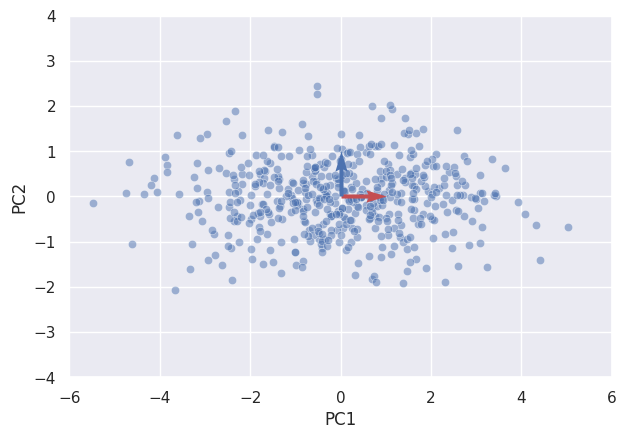

In [33]:
# Plot reduced data

plt.figure(figsize=(7,7))

sns.scatterplot(transformed_df,x='PC1',y='PC2', alpha=0.5)

plt.quiver(0, 0, 1, 0, angles='xy', scale_units='xy', scale=1, color='r', label="PC1 vector")
plt.quiver(0, 0,0, 1, angles='xy', scale_units='xy', scale=1, color='b', label="PC2 vector")


plt.xlim([-6, 6])
plt.ylim([-4, 4])

plt.gca().set_aspect('equal', adjustable='box')


In [34]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA(svd_solver='full')

pca = pca.fit(df_3D)

In [36]:
print('sklearn pca {}'.format(pca.explained_variance_ratio_*100))
print('our pca {}'.format(eigenvalues / np.sum(eigenvalues)*100))


sklearn pca [84.44956128 15.55043872  0.        ]
our pca [84.44956128 15.55043872  0.        ]


In [37]:
print('sklearn transformation matrix \n {}'.format(pca.components_))
print('our transformation matrix \n {}'.format(eigenvectors.T))

sklearn transformation matrix 
 [[ 0.34723374  0.52018598  0.78027897]
 [-0.93777861  0.19261062  0.28891594]
 [-0.          0.83205029 -0.5547002 ]]
our transformation matrix 
 [[ 0.34723374  0.52018598  0.78027897]
 [-0.93777861  0.19261062  0.28891594]
 [ 0.         -0.83205029  0.5547002 ]]


In [39]:
pca.explained_variance_ratio_ == (eigenvalues / np.sum(eigenvalues))

array([False, False, False])

In [41]:
pca.components_=pca.components_[:-1,:]


In [42]:
pca_transform_data = pca.transform(df_3D)

pca_transformed_df = pd.DataFrame(pca_transform_data, columns=['PC1', 'PC2'])

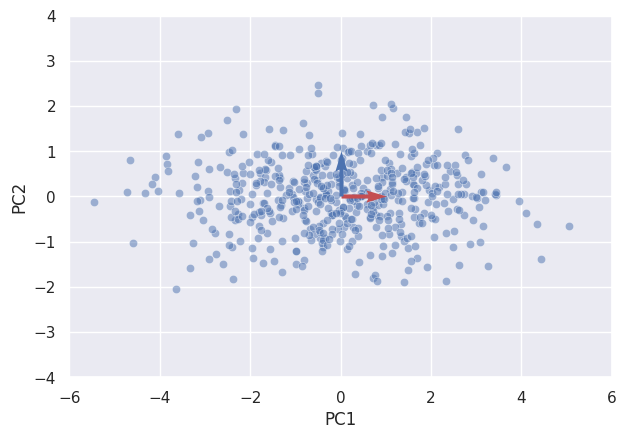

In [43]:
# Plot the reduced data
plt.figure(figsize=(7,7))

sns.scatterplot(pca_transformed_df,x='PC1',y='PC2', alpha=0.5)

plt.quiver(0, 0, 1, 0, angles='xy', scale_units='xy', scale=1, color='r', label="PC1 vector")
plt.quiver(0, 0,0, 1, angles='xy', scale_units='xy', scale=1, color='b', label="PC2 vector")


plt.xlim([-6, 6])
plt.ylim([-4, 4])

plt.gca().set_aspect('equal', adjustable='box')

In [44]:
# pandas and numpy imports
import pandas as pd
import numpy as np

# plotting imports
import matplotlib.pyplot as plt
import seaborn as sns

# import PCA
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# set sns theme and set pandas to display all rows and columns
sns.set_theme()


In [45]:
# Load iris dataset
iris = load_iris()

# Format iris dataset as dataframe
numeric_iris_df = pd.DataFrame(
    iris['data'],
    columns=iris['feature_names']
)

iris_df = numeric_iris_df.copy()
iris_df['label'] = iris['target_names'][iris['target']]


In [46]:
# Scale the data
standard_scaler = StandardScaler()
standard_scaler.fit(numeric_iris_df)
numeric_iris_df = standard_scaler.transform(numeric_iris_df)

In [47]:
# Perform PCA
pca = PCA()
pca.fit(numeric_iris_df)
pca_transformed_data = pca.transform(numeric_iris_df)

In [48]:
pca_transformed_data.shape

(150, 4)

In [49]:
# Determine variance explained by each component
[var_ration*100 for var_ration in pca.explained_variance_ratio_]

[72.96244541329987, 22.850761786701778, 3.6689218892828763, 0.5178709107154797]

In [50]:
# Plot first two principal components
iris_df_pca = pd.DataFrame(pca_transformed_data[:,:2], columns=['PC1', 'PC2'])
iris_df_pca['label'] = iris_df['label']

In [51]:
# Plot first two principal components
iris_df_pca = pd.DataFrame(pca_transformed_data[:,:2], columns=['PC1', 'PC2'])
iris_df_pca['label'] = iris_df['label']

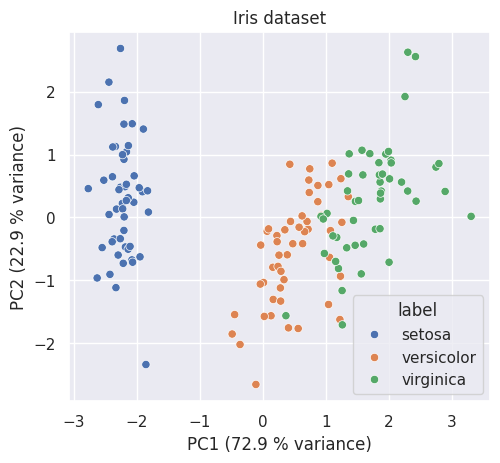

In [52]:
sns.scatterplot(iris_df_pca, x='PC1', y='PC2', hue='label')
plt.xlabel('PC1 (72.9 % variance)')
plt.ylabel('PC2 (22.9 % variance)')
plt.title('Iris dataset')
plt.gca().set_aspect('equal', adjustable='box')

In [53]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])

In [54]:
iris_df.head().T

,0,1,2,3,4
sepal length (cm),5.1,4.9,4.7,4.6,5.0
sepal width (cm),3.5,3.0,3.2,3.1,3.6
petal length (cm),1.4,1.4,1.3,1.5,1.4
petal width (cm),0.2,0.2,0.2,0.2,0.2
label,setosa,setosa,setosa,setosa,setosa


Text(0.5, 1.0, 'Iris dataset')

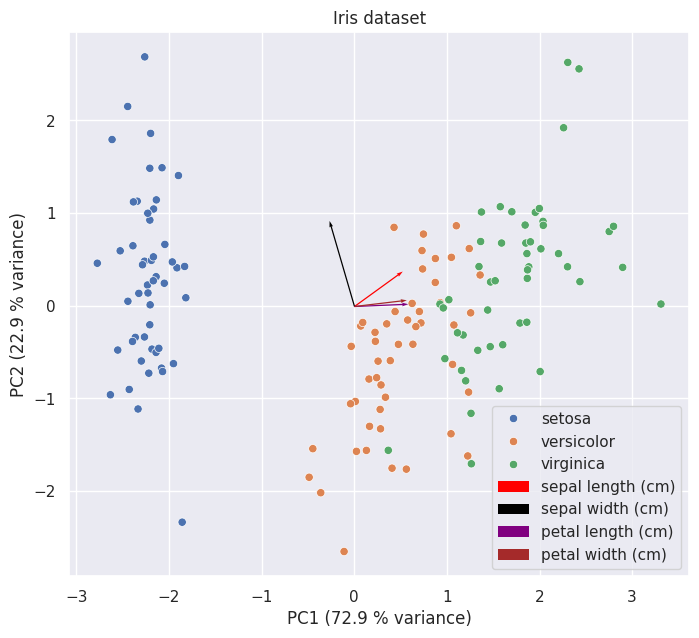

In [55]:
plt.figure(figsize=(8,8))
sns.scatterplot(iris_df_pca, x='PC1', y='PC2', hue='label')

feat_names = iris_df.columns
colors = ['red', 'black', 'purple', 'brown']

loadings = pca.components_

for i, feat_name, color in zip(range(loadings.shape[1]), feat_names, colors):

    plt.quiver(
        0, 0,
        loadings[0, i],
        loadings[1, i],
        angles='xy', scale_units='xy',
        scale=1, color=color,
        label=feat_name,
        width=0.002
    )

plt.xlabel('PC1 (72.9 % variance)')
plt.ylabel('PC2 (22.9 % variance)')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Iris dataset')


In [56]:
pca_full = PCA(svd_solver='full').fit(numeric_iris_df)
pca_arpack = PCA(svd_solver='arpack').fit(numeric_iris_df)
pca_random = PCA(svd_solver='randomized').fit(numeric_iris_df)

In [57]:
print(pca_full.explained_variance_ratio_)
print(pca_arpack.explained_variance_ratio_)
print(pca_random.explained_variance_ratio_)

[0.72962445 0.22850762 0.03668922 0.00517871]
[0.72962445 0.22850762 0.03668922]
[0.72962445 0.22850762 0.03668922 0.00517871]


In [58]:
print(pca_full.components_)
print(pca_arpack.components_)
print(pca_random.components_)

[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [-0.71956635  0.24438178  0.14212637  0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [-0.71956635  0.24438178  0.14212637  0.63427274]]
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [-0.71956635  0.24438178  0.14212637  0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]


##Wine datset

In [59]:
from sklearn.datasets import load_wine

# Load the wine dataset
wine_data = load_wine()

wine_df_numeric = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

wine_df = wine_df_numeric.copy()
wine_df['label'] = wine_data.target

In [60]:
wine_df.shape

(178, 14)

In [61]:
# Label names
target_names = wine_data.target_names
target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [62]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [63]:
wine_df.isnull().sum().T

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
label                           0
dtype: int64

In [64]:
wine_df.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


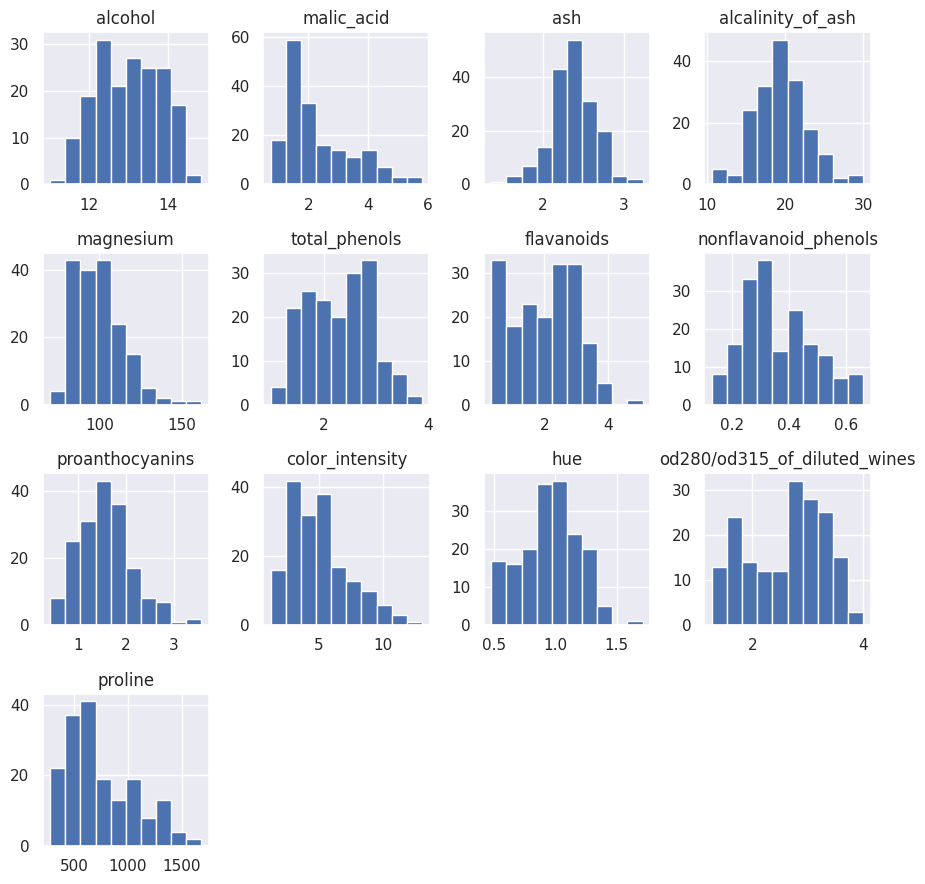

In [65]:
# Plot all the feature pairs
_ = wine_df_numeric.hist(figsize=(9,9))
plt.tight_layout()


<ipython-input-66-dea232a7e481>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = g.set_xticklabels(g.get_xticklabels(), rotation=90)


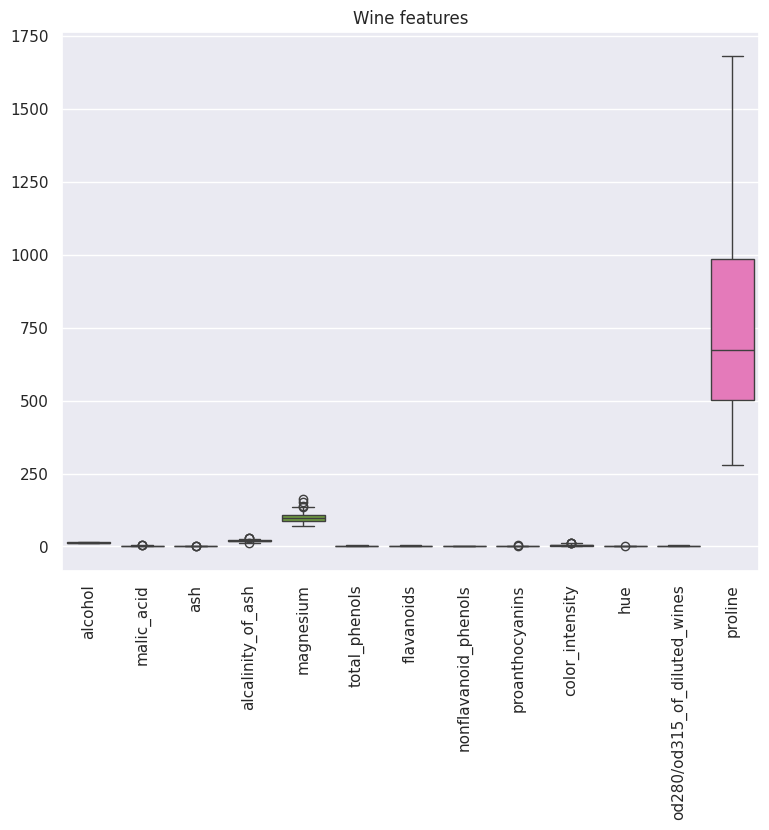

In [66]:
# Plot each individual feature
plt.figure(figsize=(9,7))
g = sns.boxplot(wine_df_numeric)
plt.title('Wine features')
_ = g.set_xticklabels(g.get_xticklabels(), rotation=90)

##Without Scaling

In [67]:
# Perform PCA without scaling the data
pca = PCA()
pca.fit(wine_df_numeric)
pca_transformed_data = pca.transform(wine_df_numeric)

# Determine variance explained by each component
[var_ration*100 for var_ration in pca.explained_variance_ratio_]

[99.80912304918974,
 0.17359156247057483,
 0.009495895755146108,
 0.005021735618215138,
 0.001236368468789777,
 0.000846213033524829,
 0.00028068145571365146,
 0.00015230805328475265,
 0.00011278304393008576,
 7.214158108199793e-05,
 3.780602665125069e-05,
 2.1201375460769042e-05,
 8.253927880930358e-06]

In [69]:
pca_transformed_data.shape

(178, 13)

In [70]:
[comp*100 for comp in pca.components_[0]]

[0.16592647196420726,
 -0.06810155555011521,
 0.01949057418915896,
 -0.4671300581276229,
 1.7868007506895367,
 0.09898296800817925,
 0.15672883017930572,
 -0.012308666181031304,
 0.06006077918217757,
 0.23271431925767475,
 0.0171380037145234,
 0.07049316445910608,
 99.98229365233257]

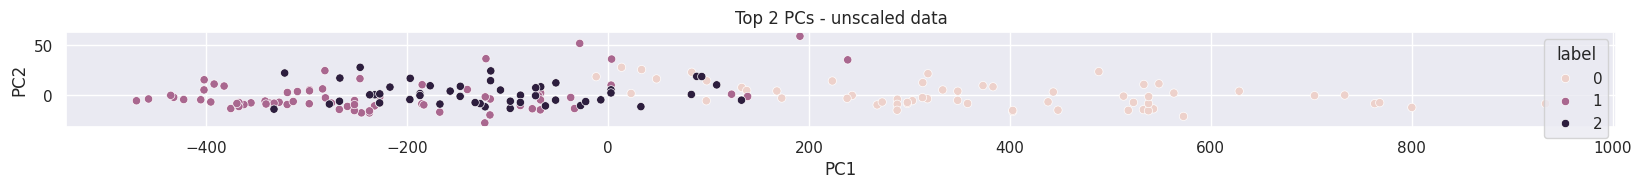

In [71]:
# Plot first two principal components
plt.figure(figsize=(20,20))
wine_df_pca = pd.DataFrame(pca_transformed_data[:,:2], columns=['PC1', 'PC2'])
wine_df_pca['label'] = wine_df['label']

sns.scatterplot(wine_df_pca, x='PC1', y='PC2', hue='label')
plt.title('Top 2 PCs - unscaled data')
plt.gca().set_aspect('equal', adjustable='box')

Text(0.5, 1.0, 'Proline feature vs vine types')

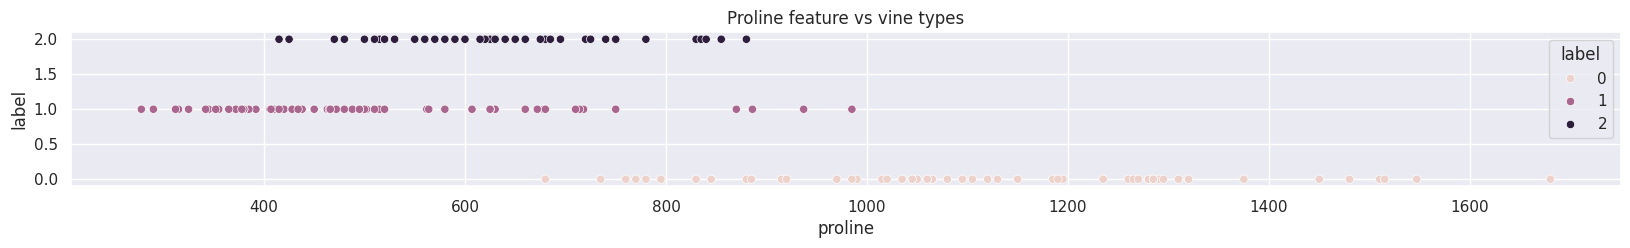

In [72]:
# Plot proline
plt.figure(figsize=(20,2))

sns.scatterplot(wine_df, x='proline', y='label', hue='label')
plt.title('Proline feature vs vine types')

##Run PCA with scaling

<ipython-input-73-ce729f614e02>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = g.set_xticklabels(g.get_xticklabels(), rotation=90)


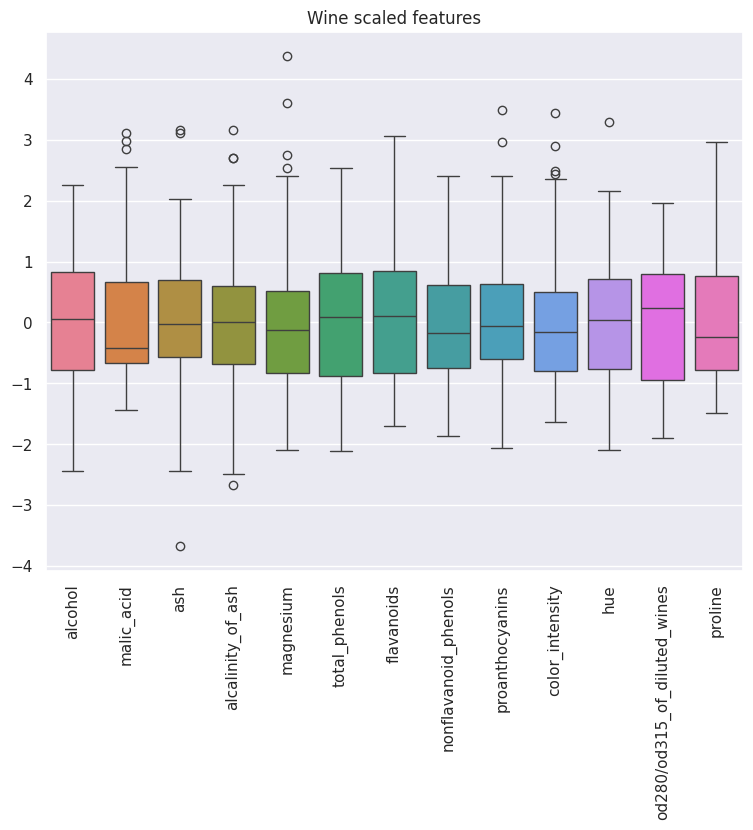

In [73]:
# Scale the data
standard_scaler = StandardScaler()
standard_scaler.fit(wine_df_numeric)
wine_df_numeric_scaled = standard_scaler.transform(wine_df_numeric)
wine_df_numeric = pd.DataFrame(
    wine_df_numeric_scaled,
    columns = wine_df_numeric.columns
)

plt.figure(figsize=(9,7))
g = sns.boxplot(wine_df_numeric)
plt.title('Wine scaled features')
_ = g.set_xticklabels(g.get_xticklabels(), rotation=90)

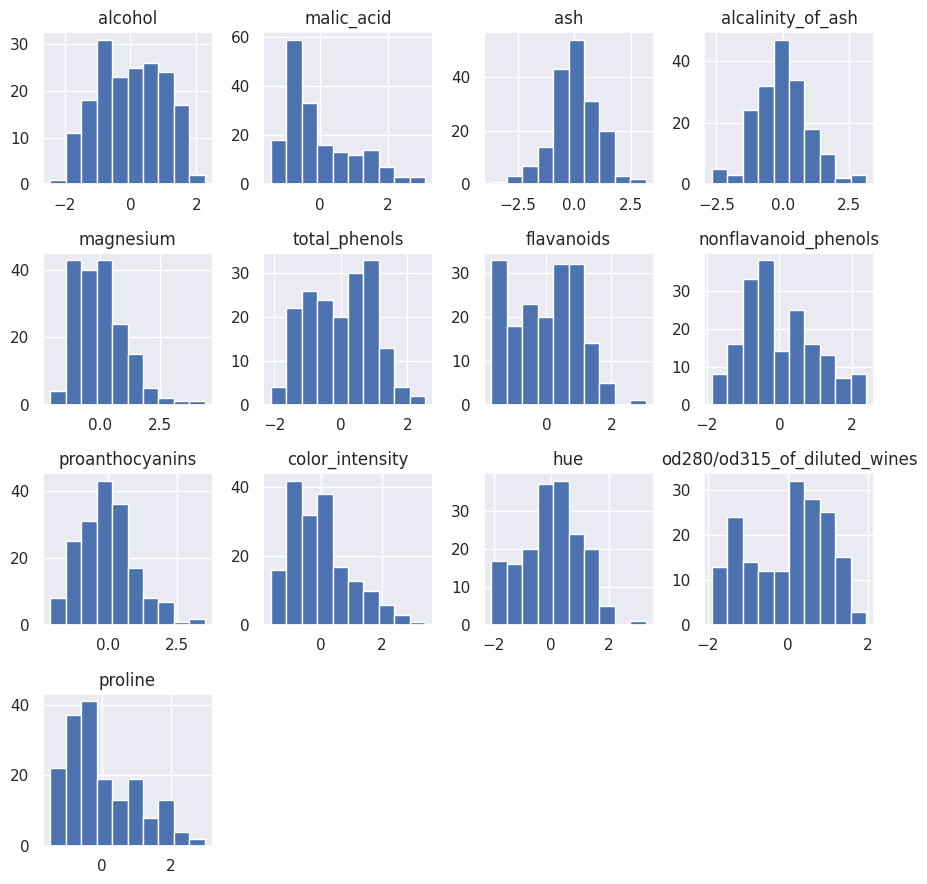

In [74]:
# Plot all the feature pairs
_ = wine_df_numeric.hist(figsize=(9,9))
plt.tight_layout()

In [75]:
# Perform PCA
pca = PCA()
pca.fit(wine_df_numeric)
pca_transformed_data = pca.transform(wine_df_numeric)

In [76]:
# Determine variance explained by each component
[var_ration*100 for var_ration in pca.explained_variance_ratio_]

[36.19884809992633,
 19.20749025700898,
 11.123630536249934,
 7.069030182714045,
 6.563293679648595,
 4.9358233192225756,
 4.238679322623315,
 2.680748948378868,
 2.222153404789714,
 1.9300190939440784,
 1.7368356899899149,
 1.29823257560421,
 0.7952148898994515]

In [77]:
[comp*100 for comp in pca.components_[0]]

[14.432939540601117,
 -24.518758025722043,
 -0.20510614443709982,
 -23.932040548753495,
 14.19920419529872,
 39.466084506663016,
 42.29342967100592,
 -29.85331029547152,
 31.34294883076887,
 -8.861670472472255,
 29.6714563586381,
 37.61674107387126,
 28.675222689680535]

In [78]:
# Plot first two principal components
wine_df_pca = pd.DataFrame(pca_transformed_data[:,:2], columns=['PC1', 'PC2'])
wine_df_pca['label'] = wine_df['label']

Text(0, 0.5, 'PC1 [19 % variance]')

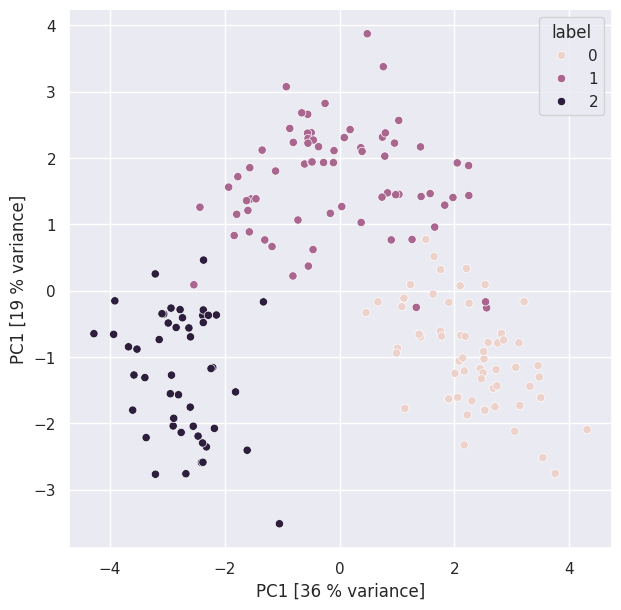

In [79]:
plt.figure(figsize=(7,7))
sns.scatterplot(wine_df_pca, x='PC1', y='PC2', hue='label')


plt.xlabel('PC1 [36 % variance]')
plt.ylabel('PC1 [19 % variance]')


In [81]:
%pip install kneed

In [82]:
# pandas and numpy imports
import pandas as pd
import numpy as np

# plotting imports
import matplotlib.pyplot as plt
import seaborn as sns

# import PCA
from sklearn.datasets import load_digits
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# import knee detection algorithm
from kneed import KneeLocator

# set sns theme and set pandas to display all rows and columns
sns.set_theme()
plt.rcParams['figure.figsize'] = [10, 6]

<ipython-input-83-be06fed5c536>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = g.set_xticklabels(g.get_xticklabels(), rotation=90)


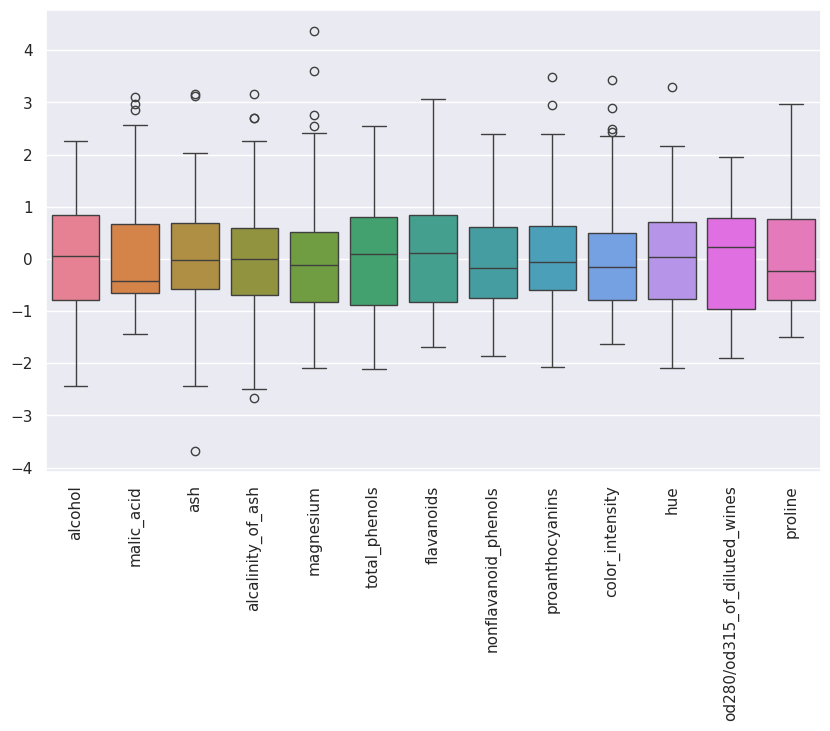

In [83]:
# Load the wine dataset
wine_data = load_wine()

wine_df_numeric = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

wine_df = wine_df_numeric.copy()
wine_df['label'] = wine_data.target

# Normalize the data
standard_scaler = StandardScaler()
standard_scaler.fit(wine_df_numeric)
wine_df_numeric_scaled = standard_scaler.transform(wine_df_numeric)

# Create data df
wine_df_numeric = pd.DataFrame(
    wine_df_numeric_scaled,
    columns = wine_df_numeric.columns
)

g = sns.boxplot(wine_df_numeric)
_ = g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [84]:
# Run full PCA
pca = PCA()
pca.fit(wine_df_numeric)
pca_transformed_data = pca.transform(wine_df_numeric)

print('Number of PCA components {}'.format(pca_transformed_data.shape[1]))
print('\nVariances explained by components:')

[var_ration*100 for var_ration in pca.explained_variance_ratio_]

Number of PCA components 13

Variances explained by components:


[36.19884809992633,
 19.20749025700898,
 11.123630536249934,
 7.069030182714045,
 6.563293679648595,
 4.9358233192225756,
 4.238679322623315,
 2.680748948378868,
 2.222153404789714,
 1.9300190939440784,
 1.7368356899899149,
 1.29823257560421,
 0.7952148898994515]

In [85]:
# Perform PCA and choose two components
pca = PCA(n_components=2)
pca.fit(wine_df_numeric)
pca_transformed_data = pca.transform(wine_df_numeric)

print('Number of PCA components {}'.format(pca_transformed_data.shape[1]))
print('\nVariances explained by components:')

[var_ration*100 for var_ration in pca.explained_variance_ratio_]

Number of PCA components 2

Variances explained by components:


[36.19884809992633, 19.20749025700898]

In [87]:
# Perform PCA and choose number of components based on desired percent of explained variance
pca = PCA(n_components=0.7)
pca.fit(wine_df_numeric)
pca_transformed_data = pca.transform(wine_df_numeric)

print('Number of PCA components {}'.format(pca_transformed_data.shape[1]))

print('\nVariances explained by components:')
print([var_ration*100 for var_ration in pca.explained_variance_ratio_])

explained_sum = sum([var_ration*100 for var_ration in pca.explained_variance_ratio_])
print('\nTotal variance explained by returned components : {}'.format(explained_sum))


Number of PCA components 4

Variances explained by components:
[36.19884809992633, 19.20749025700898, 11.123630536249934, 7.069030182714045]

Total variance explained by returned components : 73.59899907589929


Number of PCA components 13


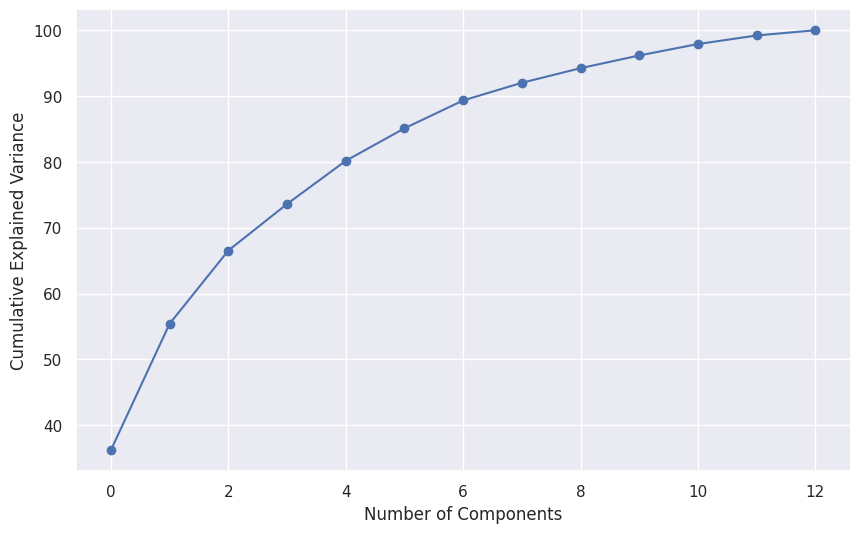

In [88]:
pca = PCA()
pca.fit(wine_df_numeric)
pca_transformed_data = pca.transform(wine_df_numeric)

print('Number of PCA components {}'.format(pca_transformed_data.shape[1]))

cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)*100

plt.plot(range(len(cumulative_explained_variance)), cumulative_explained_variance)
plt.scatter(range(len(cumulative_explained_variance)),cumulative_explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

##Elbow method

In [89]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', parser='auto')

mnist_data = mnist.data.values
mnist_label = mnist.target

In [90]:
mnist_data.shape

(70000, 784)

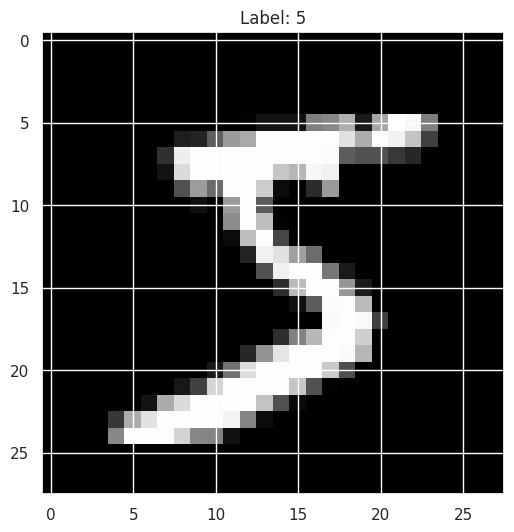

In [91]:
# Reshape image
image = np.reshape(mnist_data[0,:], [28,28])

# Display the image using matplotlib
plt.imshow(image, cmap='gray')
plt.title(f"Label: {mnist_label[0]}")
plt.show()

In [92]:
# Custom normalization
mnist_data = mnist_data/255

Number of PCA components 784


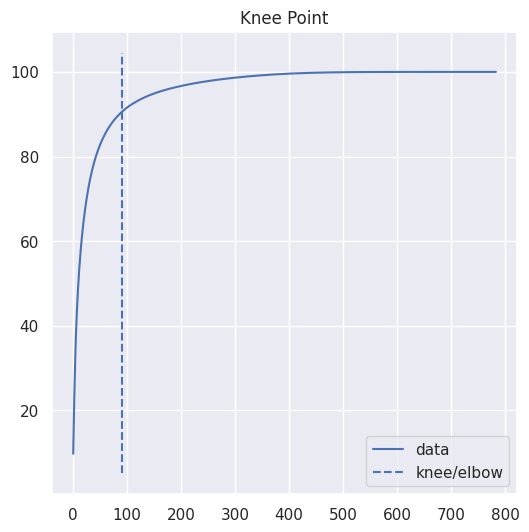

In [93]:
# Perform PCA
pca = PCA()
pca.fit(mnist_data)
pca_transformed_data = pca.transform(mnist_data)

print('Number of PCA components {}'.format(pca_transformed_data.shape[1]))

cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)*100

kneedle = KneeLocator(
    range(len(cumulative_explained_variance)),
    cumulative_explained_variance,
    curve="concave",
    direction="increasing"
)
kneedle.plot_knee()

In [94]:
kneedle.elbow

90

In [95]:
# Perform PCA
pca = PCA(n_components=kneedle.elbow)
pca.fit(mnist_data)
pca_transformed_data = pca.transform(mnist_data)

In [96]:
pca_transformed_data.shape

(70000, 90)

In [97]:
reverse_transformed_data = pca.inverse_transform(pca_transformed_data)
unscaled_data = reverse_transformed_data * 255

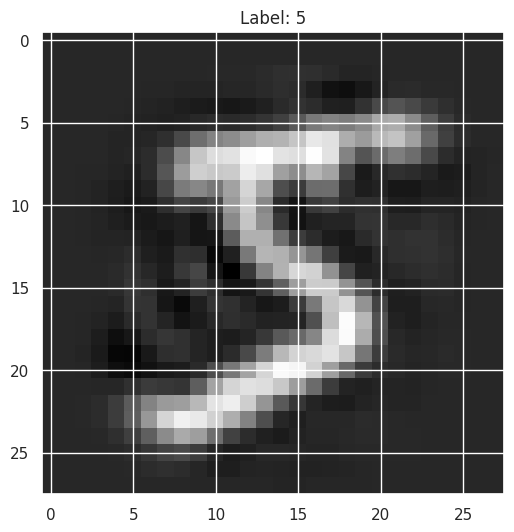

In [98]:
image = np.reshape(unscaled_data[0,:], [28,28])

# Display the image using matplotlib
plt.imshow(image, cmap='gray')
plt.title(f"Label: {mnist_label[0]}")
plt.show()

##Denoise with PCA

In [99]:
mnist = fetch_openml('mnist_784', parser='auto')

mnist_data = mnist.data.values
mnist_label = mnist.target

In [100]:
mnist_data = mnist_data/255

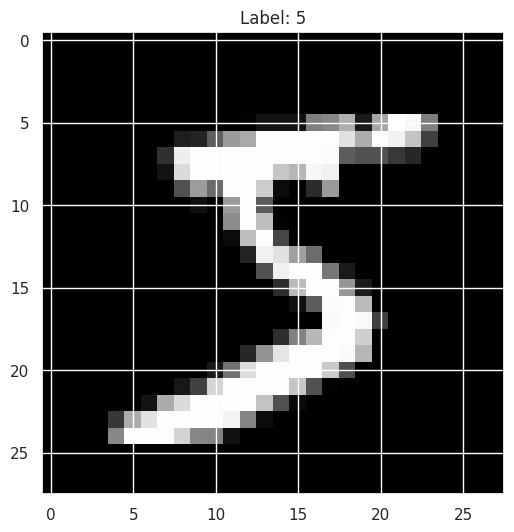

In [101]:
image = np.reshape(mnist_data[0,:], [28,28])

plt.imshow(image, cmap='gray')
plt.title(f"Label: {mnist_label[0]}")
plt.show()

In [102]:
noise = np.random.normal(0, 0.2, mnist_data.shape)
mnist_data_noisy = mnist_data + noise

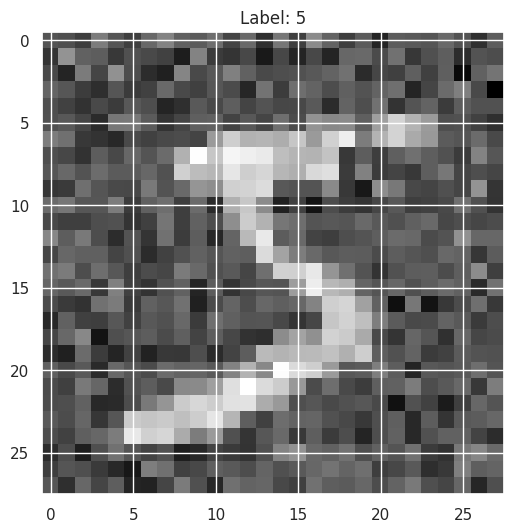

In [103]:
image = np.reshape(mnist_data_noisy[0,:], [28,28])

plt.imshow(image, cmap='gray')
plt.title(f"Label: {mnist_label[0]}")
plt.show()

Number of PCA components 784


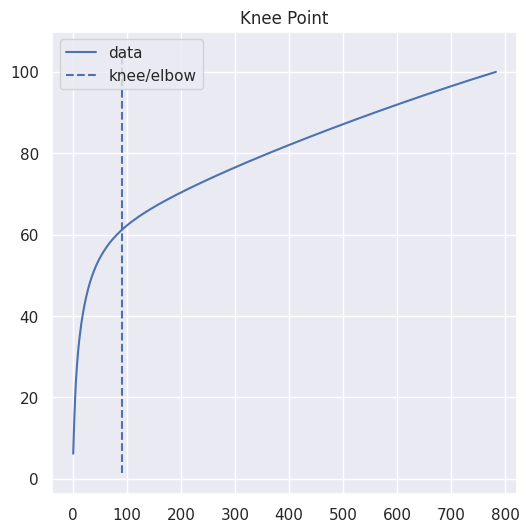

In [104]:
# Denoise with PCA
pca = PCA()
pca.fit(mnist_data_noisy)
pca_transformed_data = pca.transform(mnist_data_noisy)
print('Number of PCA components {}'.format(pca_transformed_data.shape[1]))
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)*100

kneedle = KneeLocator(
    range(len(cumulative_explained_variance)),
    cumulative_explained_variance,
    S=1.0,
    curve="concave",
    direction="increasing"
)
kneedle.plot_knee()

In [105]:
kneedle.elbow

90

In [106]:
pca = PCA(n_components=kneedle.elbow)
pca.fit(mnist_data_noisy)
pca_transformed_data = pca.transform(mnist_data_noisy)

In [107]:
pca_transformed_data.shape

(70000, 90)

In [108]:
reverse_transformed_data = pca.inverse_transform(pca_transformed_data)
unscaled_data = reverse_transformed_data * 255

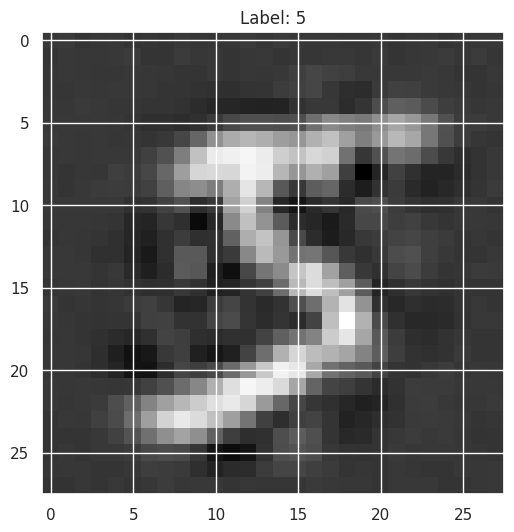

In [109]:
image = np.reshape(unscaled_data[0,:], [28,28])

plt.imshow(image, cmap='gray')
plt.title(f"Label: {mnist_label[0]}")
plt.show()

In [110]:
pca = PCA()
pca.fit(mnist_data)
pca.explained_variance_ratio_[:2]*100

array([9.74611592, 7.15544459])

Text(0, 0.5, 'PC1 [7.1 % variance]')

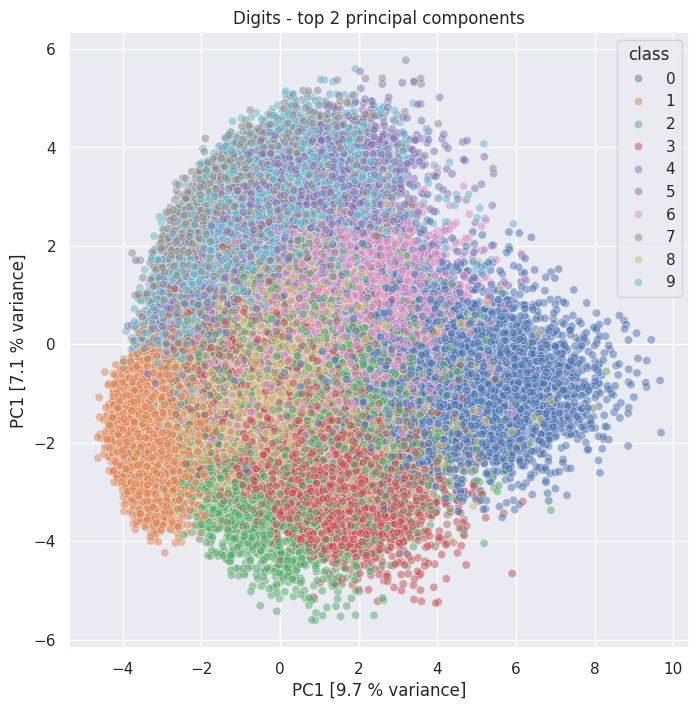

In [111]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=pca_transformed_data[:,0], y=pca_transformed_data[:,1], hue=mnist_label, alpha=0.5)

plt.title('Digits - top 2 principal components')
plt.xlabel('PC1 [9.7 % variance]')
plt.ylabel('PC1 [7.1 % variance]')